In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("batsmen.csv")
df

,Player Name,Span,Mat,Inns,NO,Runs,Highest Score,Ave,Balls Faced,Strike Rate,100s,50s,0s,4s,6s,Team name,Nation
0,Babar Azam,2016-2021,58,56,8,2070,90*,43.12,1703,121.55,0,21,6,219,35,(Karachi Kings),Pakistan
1,Kamran Akmal,2016-2021,69,68,2,1820,107*,27.57,1330,136.84,3,11,8,197,84,(Peshawar Zalmi),Pakistan
2,Shoaib Malik,2016-2021,61,57,11,1481,73,32.19,1156,128.11,0,9,4,103,58,(Peshawar Zalmi),Pakistan
3,SR Watson,2016-2020,46,46,4,1361,91*,32.40,982,138.59,0,9,2,123,81,(Quetta Gladiators),Australia
4,Fakhar Zaman,2017-2021,50,50,1,1351,94,27.57,1012,133.49,0,9,3,137,53,(Lahore Qalandars),Pakistan
5,Mohammad Hafeez,2016-2021,58,55,8,1273,98*,27.08,1050,121.23,0,8,4,119,51,(Peshawar Zalmi),Pakistan
6,Sarfaraz Ahmed,2016-2021,62,53,15,1189,81,31.28,927,128.26,0,6,2,109,23,(Quetta Gladiators),Pakistan
7,RR Rossouw,2017-2021,52,49,12,1139,100*,30.78,846,134.63,1,4,3,105,41,(Quetta Gladiators),South Africa
8,Ahmed Shehzad,2016-2020,45,43,2,1077,99,26.26,897,120.06,0,9,4,109,32,(Quetta Gladiators),Pakistan
9,L Ronchi,2018-2020,31,31,3,1020,94*,36.42,614,166.12,0,10,4,116,50,(Islamabad United),New Zealand


In [2]:
dfInns = df['Inns']
dfAve = df['Ave']
dfSR = df['Strike Rate']

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player Name    50 non-null     object 
 1   Span           50 non-null     object 
 2   Mat            50 non-null     int64  
 3   Inns           50 non-null     int64  
 4   NO             50 non-null     int64  
 5   Runs           50 non-null     int64  
 6   Highest Score  50 non-null     object 
 7   Ave            50 non-null     float64
 8   Balls Faced    50 non-null     int64  
 9   Strike Rate    50 non-null     float64
 10  100s           50 non-null     int64  
 11  50s            50 non-null     int64  
 12  0s             50 non-null     int64  
 13  4s             50 non-null     int64  
 14  6s             50 non-null     int64  
 15  Team name      50 non-null     object 
 16  Nation         50 non-null     object 
dtypes: float64(2), int64(10), object(5)
memory usage: 6.8+ K

In [4]:
#Elbow plot technique:
k_rng = range(1,10)
sse = []
for k in k_rng:
    nkm = KMeans(n_clusters=k)
    nkm.fit(df[['Inns','Ave','Strike Rate']])
    sse.append(nkm.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


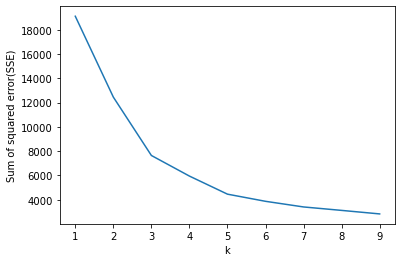

In [5]:
plt.xlabel("k")
plt.ylabel("Sum of squared error(SSE)")
plt.plot(k_rng,sse)

In [6]:
totalPlayers = df.index
print("Total number players in dataset are: ",len(totalPlayers))

Total number players in dataset are:  50


In [7]:
km = KMeans(n_clusters=3,random_state=50)

In [8]:
y_pred = km.fit_predict(df[['Inns','Ave','Strike Rate']])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 2, 2,
       2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 0])

In [9]:
df['status'] = y_pred
df

,Player Name,Span,Mat,Inns,NO,Runs,Highest Score,Ave,Balls Faced,Strike Rate,100s,50s,0s,4s,6s,Team name,Nation,status
0,Babar Azam,2016-2021,58,56,8,2070,90*,43.12,1703,121.55,0,21,6,219,35,(Karachi Kings),Pakistan,1
1,Kamran Akmal,2016-2021,69,68,2,1820,107*,27.57,1330,136.84,3,11,8,197,84,(Peshawar Zalmi),Pakistan,1
2,Shoaib Malik,2016-2021,61,57,11,1481,73,32.19,1156,128.11,0,9,4,103,58,(Peshawar Zalmi),Pakistan,1
3,SR Watson,2016-2020,46,46,4,1361,91*,32.40,982,138.59,0,9,2,123,81,(Quetta Gladiators),Australia,1
4,Fakhar Zaman,2017-2021,50,50,1,1351,94,27.57,1012,133.49,0,9,3,137,53,(Lahore Qalandars),Pakistan,1
5,Mohammad Hafeez,2016-2021,58,55,8,1273,98*,27.08,1050,121.23,0,8,4,119,51,(Peshawar Zalmi),Pakistan,1
6,Sarfaraz Ahmed,2016-2021,62,53,15,1189,81,31.28,927,128.26,0,6,2,109,23,(Quetta Gladiators),Pakistan,1
7,RR Rossouw,2017-2021,52,49,12,1139,100*,30.78,846,134.63,1,4,3,105,41,(Quetta Gladiators),South Africa,1
8,Ahmed Shehzad,2016-2020,45,43,2,1077,99,26.26,897,120.06,0,9,4,109,32,(Quetta Gladiators),Pakistan,1
9,L Ronchi,2018-2020,31,31,3,1020,94*,36.42,614,166.12,0,10,4,116,50,(Islamabad United),New Zealand,2


In [10]:
df1 = df[df.status==0]
df2 = df[df.status==1]
df3 = df[df.status==2]

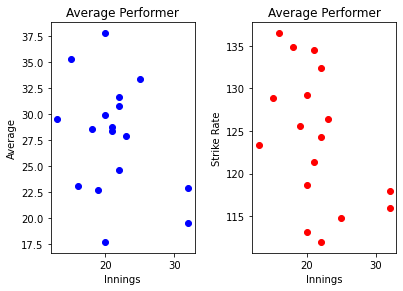

In [11]:
plt.subplot(1,2,1)
plt.scatter(df1['Inns'],df1['Ave'],color="blue")
plt.title("Average Performer")
plt.xlabel("Innings")
plt.ylabel("Average")

plt.subplot(1,2,2)
plt.scatter(df1['Inns'],df1['Strike Rate'],color="red")
plt.title("Average Performer")
plt.xlabel("Innings")
plt.ylabel("Strike Rate")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

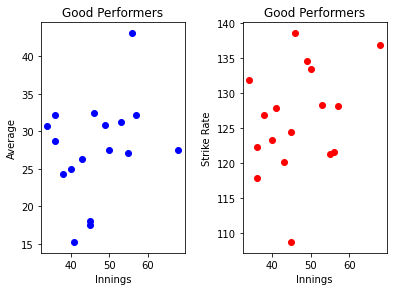

In [12]:
plt.subplot(1,2,1)
plt.scatter(df2['Inns'],df2['Ave'],color="blue")
plt.title("Good Performers")
plt.xlabel("Innings")
plt.ylabel("Average")

plt.subplot(1,2,2)
plt.scatter(df2['Inns'],df2['Strike Rate'],color="red")
plt.title("Good Performers")
plt.xlabel("Innings")
plt.ylabel("Strike Rate")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

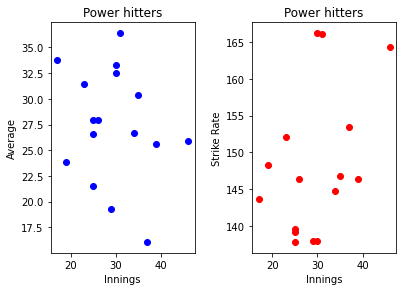

In [13]:
plt.subplot(1,2,1)
plt.scatter(df3['Inns'],df3['Ave'],color="blue")
plt.title("Power hitters")
plt.xlabel("Innings")
plt.ylabel("Average")

plt.subplot(1,2,2)
plt.scatter(df3['Inns'],df3['Strike Rate'],color="red")
plt.title("Power hitters")
plt.xlabel("Innings")
plt.ylabel("Strike Rate")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

In [14]:
mydict = {0:"average_performer",1:"good_performer",2:"power_hitter"}
df = df.replace({"status":mydict})
df

,Player Name,Span,Mat,Inns,NO,Runs,Highest Score,Ave,Balls Faced,Strike Rate,100s,50s,0s,4s,6s,Team name,Nation,status
0,Babar Azam,2016-2021,58,56,8,2070,90*,43.12,1703,121.55,0,21,6,219,35,(Karachi Kings),Pakistan,good_performer
1,Kamran Akmal,2016-2021,69,68,2,1820,107*,27.57,1330,136.84,3,11,8,197,84,(Peshawar Zalmi),Pakistan,good_performer
2,Shoaib Malik,2016-2021,61,57,11,1481,73,32.19,1156,128.11,0,9,4,103,58,(Peshawar Zalmi),Pakistan,good_performer
3,SR Watson,2016-2020,46,46,4,1361,91*,32.40,982,138.59,0,9,2,123,81,(Quetta Gladiators),Australia,good_performer
4,Fakhar Zaman,2017-2021,50,50,1,1351,94,27.57,1012,133.49,0,9,3,137,53,(Lahore Qalandars),Pakistan,good_performer
5,Mohammad Hafeez,2016-2021,58,55,8,1273,98*,27.08,1050,121.23,0,8,4,119,51,(Peshawar Zalmi),Pakistan,good_performer
6,Sarfaraz Ahmed,2016-2021,62,53,15,1189,81,31.28,927,128.26,0,6,2,109,23,(Quetta Gladiators),Pakistan,good_performer
7,RR Rossouw,2017-2021,52,49,12,1139,100*,30.78,846,134.63,1,4,3,105,41,(Quetta Gladiators),South Africa,good_performer
8,Ahmed Shehzad,2016-2020,45,43,2,1077,99,26.26,897,120.06,0,9,4,109,32,(Quetta Gladiators),Pakistan,good_performer
9,L Ronchi,2018-2020,31,31,3,1020,94*,36.42,614,166.12,0,10,4,116,50,(Islamabad United),New Zealand,power_hitter


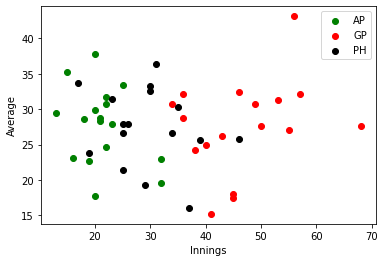

In [15]:
plt.scatter(df1['Inns'],df1['Ave'],color='green',label='AP')
plt.scatter(df2['Inns'],df2['Ave'],color='red',label='GP')
plt.scatter(df3['Inns'],df3['Ave'],color='black',label='PH')

plt.xlabel('Innings')
plt.ylabel('Average')
plt.legend()

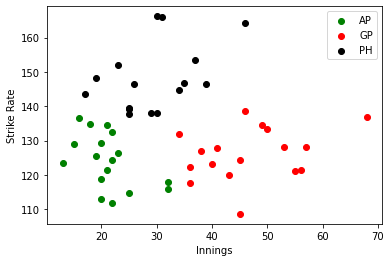

In [16]:
plt.scatter(df1['Inns'],df1['Strike Rate'],color='green',label='AP')
plt.scatter(df2['Inns'],df2['Strike Rate'],color='red',label='GP')
plt.scatter(df3['Inns'],df3['Strike Rate'],color='black',label='PH')

plt.xlabel('Innings')
plt.ylabel('Strike Rate')
plt.legend()

In [17]:
scaler = MinMaxScaler()
df['Inns'] = scaler.fit_transform(df[['Inns']])
df['Ave'] = scaler.fit_transform(df[['Ave']])
df['Strike Rate'] = scaler.fit_transform(df[['Strike Rate']])
df.head()

,Player Name,Span,Mat,Inns,NO,Runs,Highest Score,Ave,Balls Faced,Strike Rate,100s,50s,0s,4s,6s,Team name,Nation,status
0,Babar Azam,2016-2021,58,0.781818,8,2070,90*,1.000000,1703,0.224267,0,21,6,219,35,(Karachi Kings),Pakistan,good_performer
1,Kamran Akmal,2016-2021,69,1.000000,2,1820,107*,0.443052,1330,0.489672,3,11,8,197,84,(Peshawar Zalmi),Pakistan,good_performer
2,Shoaib Malik,2016-2021,61,0.800000,11,1481,73,0.608524,1156,0.338136,0,9,4,103,58,(Peshawar Zalmi),Pakistan,good_performer
3,SR Watson,2016-2020,46,0.600000,4,1361,91*,0.616046,982,0.520049,0,9,2,123,81,(Quetta Gladiators),Australia,good_performer
4,Fakhar Zaman,2017-2021,50,0.672727,1,1351,94,0.443052,1012,0.431522,0,9,3,137,53,(Lahore Qalandars),Pakistan,good_performer


In [18]:
# so we will perform clustering again to train our model
km = KMeans(n_clusters=3,random_state = 50)
y_pred = km.fit_predict(df[['Inns','Ave','Strike Rate']])
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 1, 0, 1, 0, 2, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 2, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0])

In [19]:
df['status'] = y_pred
df

,Player Name,Span,Mat,Inns,NO,Runs,Highest Score,Ave,Balls Faced,Strike Rate,100s,50s,0s,4s,6s,Team name,Nation,status
0,Babar Azam,2016-2021,58,0.781818,8,2070,90*,1.000000,1703,0.224267,0,21,6,219,35,(Karachi Kings),Pakistan,2
1,Kamran Akmal,2016-2021,69,1.000000,2,1820,107*,0.443052,1330,0.489672,3,11,8,197,84,(Peshawar Zalmi),Pakistan,2
2,Shoaib Malik,2016-2021,61,0.800000,11,1481,73,0.608524,1156,0.338136,0,9,4,103,58,(Peshawar Zalmi),Pakistan,2
3,SR Watson,2016-2020,46,0.600000,4,1361,91*,0.616046,982,0.520049,0,9,2,123,81,(Quetta Gladiators),Australia,2
4,Fakhar Zaman,2017-2021,50,0.672727,1,1351,94,0.443052,1012,0.431522,0,9,3,137,53,(Lahore Qalandars),Pakistan,2
5,Mohammad Hafeez,2016-2021,58,0.763636,8,1273,98*,0.425501,1050,0.218712,0,8,4,119,51,(Peshawar Zalmi),Pakistan,2
6,Sarfaraz Ahmed,2016-2021,62,0.727273,15,1189,81,0.575931,927,0.340739,0,6,2,109,23,(Quetta Gladiators),Pakistan,2
7,RR Rossouw,2017-2021,52,0.654545,12,1139,100*,0.558023,846,0.451311,1,4,3,105,41,(Quetta Gladiators),South Africa,2
8,Ahmed Shehzad,2016-2020,45,0.545455,2,1077,99,0.396132,897,0.198403,0,9,4,109,32,(Quetta Gladiators),Pakistan,2
9,L Ronchi,2018-2020,31,0.327273,3,1020,94*,0.760029,614,0.997917,0,10,4,116,50,(Islamabad United),New Zealand,1


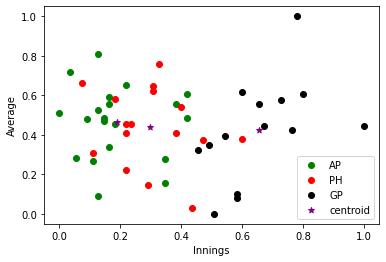

In [20]:
df1 = df[df.status==0]
df2 = df[df.status==1]
df3 = df[df.status==2]

plt.scatter(df1['Inns'],df1['Ave'],color='green',label="AP")
plt.scatter(df2['Inns'],df2['Ave'],color='red',label="PH")
plt.scatter(df3['Inns'],df3['Ave'],color='black',label="GP")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="*",label="centroid")
plt.xlabel('Innings')
plt.ylabel('Average')
plt.legend()

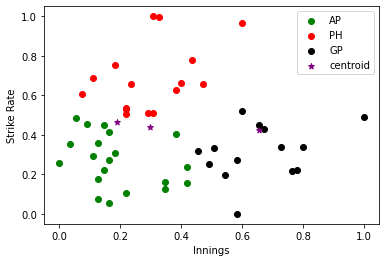

In [21]:
df1 = df[df.status==0]
df2 = df[df.status==1]
df3 = df[df.status==2]

plt.scatter(df1['Inns'],df1['Strike Rate'],color='green',label="AP")
plt.scatter(df2['Inns'],df2['Strike Rate'],color='red',label="PH")
plt.scatter(df3['Inns'],df3['Strike Rate'],color='black',label="GP")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="*",label="centroid")
plt.xlabel('Innings')
plt.ylabel('Strike Rate')
plt.legend()

In [22]:
myLabel = {0:"average_performer",1:"power_hitter",2:"good_performer"}
df = df.replace({"status":myLabel})
df

,Player Name,Span,Mat,Inns,NO,Runs,Highest Score,Ave,Balls Faced,Strike Rate,100s,50s,0s,4s,6s,Team name,Nation,status
0,Babar Azam,2016-2021,58,0.781818,8,2070,90*,1.000000,1703,0.224267,0,21,6,219,35,(Karachi Kings),Pakistan,good_performer
1,Kamran Akmal,2016-2021,69,1.000000,2,1820,107*,0.443052,1330,0.489672,3,11,8,197,84,(Peshawar Zalmi),Pakistan,good_performer
2,Shoaib Malik,2016-2021,61,0.800000,11,1481,73,0.608524,1156,0.338136,0,9,4,103,58,(Peshawar Zalmi),Pakistan,good_performer
3,SR Watson,2016-2020,46,0.600000,4,1361,91*,0.616046,982,0.520049,0,9,2,123,81,(Quetta Gladiators),Australia,good_performer
4,Fakhar Zaman,2017-2021,50,0.672727,1,1351,94,0.443052,1012,0.431522,0,9,3,137,53,(Lahore Qalandars),Pakistan,good_performer
5,Mohammad Hafeez,2016-2021,58,0.763636,8,1273,98*,0.425501,1050,0.218712,0,8,4,119,51,(Peshawar Zalmi),Pakistan,good_performer
6,Sarfaraz Ahmed,2016-2021,62,0.727273,15,1189,81,0.575931,927,0.340739,0,6,2,109,23,(Quetta Gladiators),Pakistan,good_performer
7,RR Rossouw,2017-2021,52,0.654545,12,1139,100*,0.558023,846,0.451311,1,4,3,105,41,(Quetta Gladiators),South Africa,good_performer
8,Ahmed Shehzad,2016-2020,45,0.545455,2,1077,99,0.396132,897,0.198403,0,9,4,109,32,(Quetta Gladiators),Pakistan,good_performer
9,L Ronchi,2018-2020,31,0.327273,3,1020,94*,0.760029,614,0.997917,0,10,4,116,50,(Islamabad United),New Zealand,power_hitter


In [23]:
df['Inns'] = dfInns
df['Ave'] = dfAve
df['Strike Rate'] = dfSR
df

,Player Name,Span,Mat,Inns,NO,Runs,Highest Score,Ave,Balls Faced,Strike Rate,100s,50s,0s,4s,6s,Team name,Nation,status
0,Babar Azam,2016-2021,58,56,8,2070,90*,43.12,1703,121.55,0,21,6,219,35,(Karachi Kings),Pakistan,good_performer
1,Kamran Akmal,2016-2021,69,68,2,1820,107*,27.57,1330,136.84,3,11,8,197,84,(Peshawar Zalmi),Pakistan,good_performer
2,Shoaib Malik,2016-2021,61,57,11,1481,73,32.19,1156,128.11,0,9,4,103,58,(Peshawar Zalmi),Pakistan,good_performer
3,SR Watson,2016-2020,46,46,4,1361,91*,32.40,982,138.59,0,9,2,123,81,(Quetta Gladiators),Australia,good_performer
4,Fakhar Zaman,2017-2021,50,50,1,1351,94,27.57,1012,133.49,0,9,3,137,53,(Lahore Qalandars),Pakistan,good_performer
5,Mohammad Hafeez,2016-2021,58,55,8,1273,98*,27.08,1050,121.23,0,8,4,119,51,(Peshawar Zalmi),Pakistan,good_performer
6,Sarfaraz Ahmed,2016-2021,62,53,15,1189,81,31.28,927,128.26,0,6,2,109,23,(Quetta Gladiators),Pakistan,good_performer
7,RR Rossouw,2017-2021,52,49,12,1139,100*,30.78,846,134.63,1,4,3,105,41,(Quetta Gladiators),South Africa,good_performer
8,Ahmed Shehzad,2016-2020,45,43,2,1077,99,26.26,897,120.06,0,9,4,109,32,(Quetta Gladiators),Pakistan,good_performer
9,L Ronchi,2018-2020,31,31,3,1020,94*,36.42,614,166.12,0,10,4,116,50,(Islamabad United),New Zealand,power_hitter


In [24]:
df.to_csv("batsmenLabel.csv",index=False)